In [2]:
# Dependencies and Setup
import base64
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import base64
from requests.auth import HTTPBasicAuth
import scipy.stats as st
from pprint import pprint

# Import Spotify API key


In [3]:
# Create playlist dataframe from csv file that contains a list of playlist IDs that we want to search tracks for
play_df = pd.read_csv("datasets/playlist_top_5_input.csv")
play_df.head()

# Prepare output csv file path to save the playlists and tracks data retrieved from the Spotify API
spotify_playlists_csv = "datasets/playlist_top_5_output.csv"

In [4]:
file = 'datasets/playlist_top_5_output.csv'
file

'datasets/playlist_top_5_output.csv'

In [5]:
df = pd.read_csv(file)
df.head()

,Unnamed: 0,Playlist ID,Track ID,Track Position,Track Name,Track Added At,Track Popularity,Track Duration,Available Markets,Album,...,Time Signature,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Valence,Tempo
0,0,37i9dQZF1DXcBWIGoYBM5M,2usxQITOSDqvkYiI0oIwao,1,You should be sad,2020-01-29T19:04:50Z,89,205473,79,You should be sad,...,4.0,0.14300,0.591,0.585,0.000000,0.1090,-6.350,0.0277,0.324,110.940
1,1,37i9dQZF1DXcBWIGoYBM5M,0nbXyq5TXYPCO7pr3N8S4I,2,The Box,2020-01-29T19:04:50Z,100,196652,78,Please Excuse Me For Being Antisocial,...,4.0,0.10400,0.896,0.586,0.000000,0.7900,-6.687,0.0559,0.642,116.971
2,2,37i9dQZF1DXcBWIGoYBM5M,2Fxmhks0bxGSBdJ92vM42m,3,bad guy,2020-01-29T19:04:50Z,95,194087,79,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",...,4.0,0.32800,0.701,0.425,0.130000,0.1000,-10.965,0.3750,0.562,135.128
3,3,37i9dQZF1DXcBWIGoYBM5M,0sf12qNH5qcw8qpgymFOqD,4,Blinding Lights,2020-01-29T19:04:50Z,98,201573,79,Blinding Lights,...,4.0,0.00147,0.513,0.796,0.000209,0.0938,-4.075,0.0629,0.345,171.017
4,4,37i9dQZF1DXcBWIGoYBM5M,4TnjEaWOeW0eKTKIEvJyCa,5,Falling,2020-01-29T19:04:50Z,98,159381,79,Falling,...,4.0,0.12300,0.784,0.430,0.000000,0.0887,-8.756,0.0364,0.236,127.087


In [31]:
df.columns

Index(['Unnamed: 0', 'Playlist ID', 'Track ID', 'Track Position', 'Track Name',
       'Track Added At', 'Track Popularity', 'Track Duration',
       'Available Markets', 'Album', 'Album Type', 'Artist', 'Release Date',
       'Key', 'Mode', 'Time Signature', 'Acousticness', 'Danceability',
       'Energy', 'Instrumentalness', 'Liveness', 'Loudness', 'Speechiness',
       'Valence', 'Tempo'],
      dtype='object')

In [34]:
Ndf = df.drop(['Track ID', 'Track Added At',
        'Track Duration', 'Available Markets', 'Album',
       'Album Type', 'Artist', 'Release Date','Instrumentalness' ,'Key', 'Mode', 'Time Signature',
       'Acousticness', 'Speechiness', 'Tempo',
       'Speechiness', 'Tempo'], axis=1)

In [44]:
FrameDf = Ndf.sort_values("Track Popularity", ascending=False)
FrameDf


,Unnamed: 0,Playlist ID,Track Position,Track Name,Track Popularity,Danceability,Energy,Liveness,Loudness,Valence
372,372,37i9dQZF1DX0XUsuxWHRQd,4,The Box,100,0.896,0.586,0.7900,-6.687,0.642
571,571,37i9dQZF1DX2RxBh64BHjQ,1,The Box,100,0.896,0.586,0.7900,-6.687,0.642
422,422,37i9dQZF1DWY4xHQp97fN6,2,The Box,100,0.896,0.586,0.7900,-6.687,0.642
1,1,37i9dQZF1DXcBWIGoYBM5M,2,The Box,100,0.896,0.586,0.7900,-6.687,0.642
1741,1741,37i9dQZF1DWSpF87bP6JSF,1,Tusa,99,0.803,0.715,0.0574,-3.280,0.574
...,...,...,...,...,...,...,...,...,...,...
3644,3644,37i9dQZF1DWVzZlRWgqAGH,17,And Then You,0,0.688,0.779,0.3490,-10.129,0.938
4387,4387,37i9dQZF1DXasneILDRM7B,4,Stupid For You,0,0.210,0.940,0.2690,-3.427,0.255
3634,3634,37i9dQZF1DWVzZlRWgqAGH,7,Kindness,0,0.705,0.782,0.1380,-6.284,0.963
4391,4391,37i9dQZF1DXasneILDRM7B,8,Tell Me I'm A Wreck,0,0.423,0.940,0.1780,-4.012,0.505


In [45]:
Frame2 = FrameDf.drop_duplicates(subset='Track Name', keep="first")
Frame2

,Unnamed: 0,Playlist ID,Track Position,Track Name,Track Popularity,Danceability,Energy,Liveness,Loudness,Valence
372,372,37i9dQZF1DX0XUsuxWHRQd,4,The Box,100,0.896,0.586,0.7900,-6.687,0.642
1741,1741,37i9dQZF1DWSpF87bP6JSF,1,Tusa,99,0.803,0.715,0.0574,-3.280,0.574
10,10,37i9dQZF1DXcBWIGoYBM5M,11,ROXANNE,99,0.621,0.601,0.4600,-5.616,0.457
119,119,37i9dQZF1DWUa8ZRTfalHk,70,Blinding Lights,98,0.513,0.796,0.0938,-4.075,0.345
4,4,37i9dQZF1DXcBWIGoYBM5M,5,Falling,98,0.784,0.430,0.0887,-8.756,0.236
...,...,...,...,...,...,...,...,...,...,...
3848,3848,37i9dQZF1DX5J7FIl4q56G,31,Lions,0,0.237,0.828,0.7410,-9.729,0.167
3644,3644,37i9dQZF1DWVzZlRWgqAGH,17,And Then You,0,0.688,0.779,0.3490,-10.129,0.938
4387,4387,37i9dQZF1DXasneILDRM7B,4,Stupid For You,0,0.210,0.940,0.2690,-3.427,0.255
3634,3634,37i9dQZF1DWVzZlRWgqAGH,7,Kindness,0,0.705,0.782,0.1380,-6.284,0.963


In [47]:
# Find the mean of each category
Popularity = Frame2["Track Popularity"].mean()
Danceable = Frame2["Danceability"].mean()
Energetic = Frame2["Energy"].mean()
Lively = Frame2["Liveness"].mean()
Loud = Frame2["Loudness"].mean()
Valence1 = Frame2["Valence"].mean()

# Create new data Frame of Mean
Frame3 = pd.DataFrame(
    {"Track Popularity":[Popularity],
     "Danceability":[Danceable],
     "Energy":[Energetic],
     "Liveness":[Lively],
     "Loudness":[Loud],
     "Valence":[Valence1]})

Frame3

,Track Popularity,Danceability,Energy,Liveness,Loudness,Valence
0,53.508655,0.595132,0.656812,0.180167,-7.259907,0.483787


In [48]:
# The lables for each section of the pie chart
labels = ["Energy", "Danceability", "Liveness", "Loudness","Valence"]

# The values of each section of the pie chart
sizes = [ 06.5528,05.9566, 01.79431,0, 0.483787]

# The colors of each section of the pie chart
colors = ["red", "orange", "blue", "green", "yellow"]

# Tells matplotlib to seperate the "Energy" section from the others
explode = (0.1, 0, 0, 0, 0)



([<matplotlib.patches.Wedge at 0x1a1d38f9d0>,
 [Text(-0.9224279452263078, -0.767545885185747, 'Energy'),
  Text(1.0758280375096072, 0.22933389132055357, 'Danceability'),
  Text(-0.31022818037367567, 1.0553475617549124, 'Liveness'),
  Text(-0.6805853007584137, 0.8641780189240986, 'Loudness'),
  Text(-0.765657774620021, 0.7897899544587265, 'Valence')],
 [Text(-0.5380829680486795, -0.44773509969168573, '44.3%'),
  Text(0.5868152931870584, 0.12509121344757465, '40.3%'),
  Text(-0.169215371112914, 0.5756441245935885, '12.1%'),
  Text(-0.3712283458682257, 0.47136982850405373, '0.0%'),
  Text(-0.4176315134291023, 0.43079452061385076, '3.3%')])

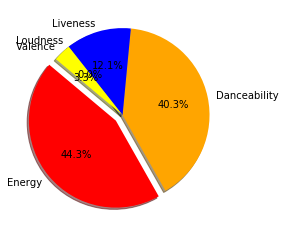

In [49]:
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode = explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

In [57]:
music = [0.59566, 0.65528, 0.179431, .01, 0.483787]
x_axis = np.arange(len(music))

Text(0, 0.5, 'Average score of Top 3755 songs')

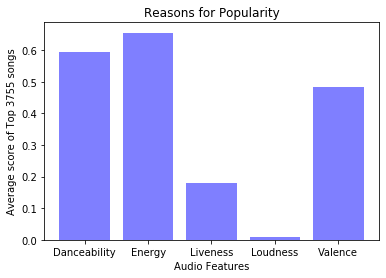

In [59]:
plt.bar(x_axis, music, color='b', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Danceability", "Energy", "Liveness", "Loudness", "Valence"])
plt.title("Reasons for Popularity")
plt.xlabel("Audio Features")
plt.ylabel("Average score of Top 3755 songs")

(-0.05, 1.05, -0.05, 1.05)

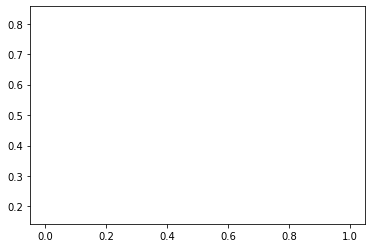

In [22]:
plt.axis("equal")

In [ ]:
# How are popular songs trending in terms of their valence, 
# i.e. songs that sound more positive (e.g. happy, cheerful, euphoric), 
# vs songs that sound more negative (e.g. sad, depressed, angry)? 
# Is there any correlation between the speechiness and the valence of a song?

In [63]:
Q3datFra = df.drop(['Unnamed: 0', 'Playlist ID', 'Track ID',
       'Track Added At',
       'Available Markets', 'Album', 'Album Type', 'Artist', 'Release Date',
       'Key', 'Mode', 'Time Signature', 'Acousticness', 'Danceability',
       'Energy', 'Instrumentalness', 'Liveness', 'Loudness', 'Speechiness',
       'Valence', 'Tempo'], axis=1)

In [78]:
Q3datFra


,Track Position,Track Name,Track Popularity,Track Duration
0,1,You should be sad,89,205473
1,2,The Box,100,196652
2,3,bad guy,95,194087
3,4,Blinding Lights,98,201573
4,5,Falling,98,159381
...,...,...,...,...
4428,45,Motion Sickness,53,205125
4429,46,Gives You Hell,8,213106
4430,47,Right Girl,52,216986
4431,48,Broken Heart,47,187371


In [91]:
Q3datFra["Track Duration"] = Q3datFra["Track Duration"]/60000
Q3datFra.head(55)

,Track Position,Track Name,Track Popularity,Track Duration
0,1,You should be sad,89,2.642400e-19
1,2,The Box,100,2.528961e-19
2,3,bad guy,95,2.495975e-19
3,4,Blinding Lights,98,2.592245e-19
4,5,Falling,98,2.049653e-19
5,6,Yummy,97,2.706096e-19
6,7,Life Is Good (feat. Drake),96,3.057292e-19
7,8,Rare,90,2.836793e-19
8,9,Don't Start Now,97,2.357124e-19
9,10,What A Man Gotta Do,87,2.323097e-19


In [ ]:
"""
Code to retrieve a Track's Audio Features using the Spotify API as described here:
https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/
"""
# Initialize audio track feature lists and variables to save data to
track_key = []
track_mode = []
track_time_signature = []
track_acousticness = []
track_danceability = []
track_energy = []
track_instrumentalness = []
track_liveness = []
track_loudness = []
track_speechiness = []
track_valence = []
track_tempo = []
track_count = 0

# Loop through each track to grab the individual audio features associated with it
print (f"Started retrieving audio features data for all {len(track_ids)} tracks across {len(playlist_ids)} different playlists")
print ("This may take a while, so hang tight...")

for track_id in track_ids:
    
    # Increment track counter for using in the print log
    track_count = track_count + 1

    # Handle any exceptions for Spotify's Get Audio Features API
    try:
        # Build Spotify's Get Playlist's Tracks URL
        spotify_tracks_url = f'https://api.spotify.com/v1/audio-features/{track_id}'
        # Build the header for Bearer token containing the base64 encoded string so we can retrieve the playlist's tracks 
        audio_features_api_headers = { 'Authorization': 'Bearer %s' % spotify_access_token }
        # Call the Get Playlist's Tracks API URL and save into response objects
        audio_features_status = requests.get(spotify_tracks_url, headers=audio_features_api_headers, data={})
        audio_features_response = audio_features_status.json()

        # If API returns successful response go ahead and retrieve the data 
        if  audio_features_status.status_code == 200:
            # Grab all the audio features from the track and save to respective lists
            track_key.append(audio_features_response['key'])
            track_mode.append(audio_features_response['mode'])
            track_time_signature.append(audio_features_response['time_signature'])
            track_acousticness.append(audio_features_response['acousticness'])
            track_danceability.append(audio_features_response['danceability'])
            track_energy.append(audio_features_response['energy'])
            track_instrumentalness.append(audio_features_response['instrumentalness'])
            track_liveness.append(audio_features_response['liveness'])
            track_loudness.append(audio_features_response['loudness'])
            track_speechiness.append(audio_features_response['speechiness'])
            track_valence.append(audio_features_response['valence'])
            track_tempo.append(audio_features_response['tempo'])
        
        # If API response results in a HTTP status code 429 it means Too Many Requests - Rate limiting has been applied
        # We check the Retry-After header in the response to get the number of seconds to wait, before retrying the next request
        elif audio_features_status.status_code == 429:
            retry_after = int(audio_features_status.headers["Retry-After"])
            print (f"Waiting for {retry_after} seconds before attempting the next request")
            time.sleep(retry_after)
        # Catch any exceptions thrown by the Spotify API
    except Exception as e:
        print(e)
        pass
    
    if track_count % 100 == 0:
        print(f"Done retrieving data for {track_count} tracks; moving on to the next set, keep hanging tight...")

print (f"Finished gathering audio features data for a total of {len(track_ids)} tracks across {len(playlist_ids)} different playlists!")

In [ ]:
"""
Code to retrieve a Spotify Playlist's Tracks and related data:
https://developer.spotify.com/documentation/web-api/reference/playlists/get-playlists-tracks/
"""
# Sample Playlist ID
playlist_ids = play_df["List ID"]

# Initialize lists to save playlist data
track_ids = []
track_added_at = []
track_names = []
track_popularity = []
track_durations = []
artists = []
albums = []
album_types = []
release_dates = []
num_available_markets = []

# Loop through each Playlist to grab the individual tracks in it
for playlist_id in playlist_ids:

    # Handle any exceptions for Spotify's Get Playlist's Tracks API
    try:
        # Build Spotify's Get Playlist's Tracks URL
        spotify_playlists_url = f'https://api.spotify.com/v1/playlists/{playlist_id}/tracks'
        # Build the header for Bearer token containing the base64 encoded string so we can retrieve the playlist's tracks 
        playlist_api_headers = { 'Authorization': 'Bearer %s' % spotify_access_token }
        # Call the Get Playlist's Tracks API URL and save as a JSON response object
        spotify_playlists_response = requests.get(spotify_playlists_url, headers=playlist_api_headers, data={}).json()
        
        # Get total tracks contained in playlist
        total_tracks = spotify_playlists_response['total']
        # Number of tracks that can be retrieved (Spotify limit = 100)
        track_limit = len(spotify_playlists_response['items'])

        # Playlist returns a track object which we will parse to retrieve all the track, album and artist data
        for item in range(track_limit):
            
            # Check if a track has a video
            if spotify_playlists_response['items'][item]['track'] is not None:
                # Get the date and time the track was added to the playlist 
                track_added_at.append(spotify_playlists_response['items'][item]['added_at'])
                # Get the ID of the track 
                track_ids.append(spotify_playlists_response['items'][item]['track']['id'])
                # Get the name of the track
                track_names.append(spotify_playlists_response['items'][item]['track']['name'])
                # Get the popularity score of the track
                track_popularity.append(spotify_playlists_response['items'][item]['track']['popularity'])
                # Get the track duration (song length) in milliseconds
                track_durations.append(spotify_playlists_response['items'][item]['track']['duration_ms'])
                # Get the number of markets that the track is available in
                num_available_markets.append(len(spotify_playlists_response['items'][item]['track']['available_markets']))
                # Get the album name
                albums.append(spotify_playlists_response['items'][item]['track']['album']['name'])
                # Get the album type: single, album or compilation
                album_types.append(spotify_playlists_response['items'][item]['track']['album']['album_type'])
                # Get the album release date
                release_dates.append(spotify_playlists_response['items'][item]['track']['album']['release_date'])

                # Each track could be associated with one or more artists
                # Parse through each artist object to retrieve their names
                artist_name = ''
                artists_count = len(spotify_playlists_response['items'][item]['track']['artists'])
                for artist in range(artists_count):
                    artist_name = artist_name + '|' + spotify_playlists_response['items'][item]['track']['artists'][artist]['name']

                artists.append(artist_name)
                
        print(f"Finished processing Playlist {playlist_id} with total tracks: {total_tracks} | Retrieval limited to {track_limit}")

    # Catch any exceptions thrown by the Spotify API
    except Exception as e:
        print(e)
        pass

In [ ]:
#playlist_data_df = pd.DataFrame(, 'Valence': track_valence, 'Tempo': track_tempo } )
track_ids_series = pd.Series(track_ids, name='Track ID')
track_names_series = pd.Series(track_names, name='Track Name')
track_added_at_series = pd.Series(track_added_at, name='Track Added At')
track_popularity_series = pd.Series(track_popularity, name='Track Popularity')
track_durations_series = pd.Series(track_durations, name='Track Duration')
num_available_markets_series = pd.Series(num_available_markets, name='Available Markets')
albums_series = pd.Series(albums, name='Album')
album_types_series = pd.Series(album_types, name='Album Type')
artists_series = pd.Series(artists, name='Artist')
release_dates_series = pd.Series(release_dates, name='Release Date')
track_key_series = pd.Series(track_key, name='Key')
track_mode_series = pd.Series(track_mode, name='Mode')
track_time_signature_series = pd.Series(track_time_signature, name='Time Signature')
track_acousticness_series = pd.Series(track_acousticness, name='Acousticness')
track_danceability_series = pd.Series(track_danceability, name='Danceability')
track_energy_series = pd.Series(track_energy, name='Energy')
track_instrumentalness_series = pd.Series(track_instrumentalness, name='Instrumentalness')
track_liveness_series = pd.Series(track_liveness, name='Liveness')
track_loudness_series = pd.Series(track_loudness, name='Loudness')
track_speechiness_series = pd.Series(track_speechiness, name='Speechiness')
track_valence_series = pd.Series(track_valence, name='Valence')
track_tempo_series = pd.Series(track_tempo, name='Tempo')

df = pd.concat([track_ids_series,track_names_series,track_added_at_series,track_popularity_series,track_durations_series,num_available_markets_series,albums_series,album_types_series,artists_series,release_dates_series,track_key_series,track_mode_series,track_time_signature_series,track_acousticness_series,track_danceability_series,track_energy_series,track_instrumentalness_series,track_liveness_series,track_loudness_series,track_speechiness_series,track_valence_series,track_tempo_series,track_speechiness_series,track_valence_series,track_tempo_series], axis=1)
playlist_df=df.dropna()

# Export the playlists' tracks data to a csv
playlist_df.to_csv(spotify_playlists_csv)

# Confirm the DataFrame counts look OK
print (playlist_df.count())

# Display the playlists' tracks data frame
playlist_df.head()
